Background for loan default:
https://www.investopedia.com/terms/d/default2.asp

# Capstone - Loan Status Prediction Data Analysis

**Goal**: Build machine learning model(s) to predict loan status as target: if a loan will be charged-off (1), or stay current/are paid off (0). 

(1827125, 145)

https://www.wellsfargo.com/financial-education/credit-management/calculate-credit-score/#:~:text=This%20is%20based%20on%20the,if%20you%20pay%20on%20time
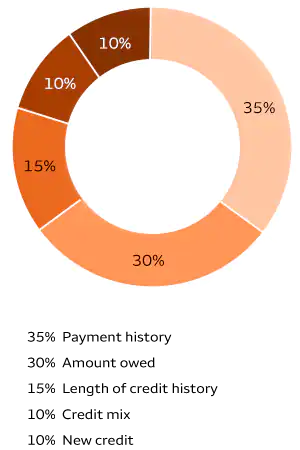

## Import packages

In [1]:
# Install packages
# import sys
# !{sys.executable} -m pip install kneed

# Get path 
import os
from pathlib import Path # get path

# Data wrangling
import pandas as pd
import numpy as np 
import math


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot # qqplot for data normality test

# Statistical testing
import scipy.stats as stats


# Reporting
from pandas_profiling import ProfileReport


# PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


#ML model building

# Logistic regression
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from dmba import classificationSummary


# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from dmba import plotDecisionTree, textDecisionTree # tree visualization

no display found. Using non-interactive Agg backend


## Load dataset

In [2]:
# load dataset
data_path = Path('.').resolve().parents[1] / 'train_data.csv' 
train = pd.read_csv(data_path)

/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_18170/2671093429.py:3: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(data_path)


In [3]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,8.81,317.12,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,27.27,306.97,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4800,4800,4800.0,36 months,16.91,170.92,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000.0,36 months,14.47,1204.23,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,15975.0,60 months,10.08,340.59,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.shape

(1827125, 145)

In [5]:
train.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Get rid of attributes only has fewer than 10% data 

In [6]:
na_tally = train.isna().sum().sort_values(ascending = False)

In [7]:
# list of >90% data missing 
na_tally[na_tally>train.shape[0]*0.9]

id                                            1827125
url                                           1827125
member_id                                     1827125
orig_projected_additional_accrued_interest    1822116
hardship_length                               1821000
hardship_reason                               1821000
hardship_status                               1821000
deferral_term                                 1821000
hardship_amount                               1821000
hardship_start_date                           1821000
hardship_end_date                             1821000
payment_plan_start_date                       1821000
hardship_dpd                                  1821000
hardship_loan_status                          1821000
hardship_payoff_balance_amount                1821000
hardship_last_payment_amount                  1821000
hardship_type                                 1821000
debt_settlement_flag_date                     1810175
settlement_status           

## Create modified Training dataset for model building - `trn`
1. remove >90% missing value columns
2. create dummy variable for target variable: 0='charged off', 1='Fully paid' or 'Current'

Charged off event rate is: 
paid off: 0.9269201614558391


In [8]:
# Get trn dataset
trn = train.copy().drop(columns=na_tally[na_tally>train.shape[0]*0.9].index)

# target variable and transformation
print(trn['loan_status'].unique())

trn['loan_status_dv'] = [0 if loan_status=='Fully Paid'or loan_status=='Current' else 1 for loan_status in trn['loan_status']]
print("Charged off event rate is: {}".format(trn['loan_status_dv'].mean()))
print("Paid off event rate is: {}".format(1-trn['loan_status_dv'].mean()))

['Charged Off' 'Current' 'Fully Paid']
Charged off event rate is: 0.0730798385441609
Paid off event rate is: 0.9269201614558391


In [9]:
###### optional to run #########
# sample a 3_pct dataset to investigate 

# trn_sample_3pct = trn.sample(n = int(trn.shape[0]*0.03), replace = False, random_state=2) # 91356
# trn_sample_3pct.to_csv('trn_sample_3pct.csv')  

In [10]:
trn['loan_status'].value_counts()

Fully Paid     865468
Current        828131
Charged Off    133526
Name: loan_status, dtype: int64

In [11]:
trn.shape

(1827125, 108)

In [12]:
trn_coln = trn.columns
trn_coln.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_ba

In [13]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827125 entries, 0 to 1827124
Columns: 108 entries, loan_amnt to loan_status_dv
dtypes: float64(80), int64(5), object(23)
memory usage: 1.5+ GB


# Exploratory data analysis  
Goal to select features for training

Final outcome: `trn_dropEDA` dataset

Features dropped:
- object to drop: coln_obj_drop
- int, float to drop: funded_amntm, funded_amnt_inv, out_prncp_inv,total_pymnt_inv
- Int type feature to train: loan_amnt, revol_bal


In [14]:
profile = ProfileReport(trn, minimal=True, title="Loans trn Profiling Report")
#profile.to_file("trn_profile.html")

In [15]:
# check NAs - 38 columns with NA
trn.isna().sum().sort_values(ascending=False).head(38)

mths_since_last_record            1532158
mths_since_recent_bc_dlq          1396890
mths_since_last_major_derog       1346127
mths_since_recent_revol_delinq    1216894
next_pymnt_d                       998994
mths_since_last_delinq             932516
il_util                            815757
mths_since_rcnt_il                 679739
all_util                           642907
open_acc_6m                        642717
inq_last_12m                       642717
total_cu_tl                        642717
total_bal_il                       642716
open_rv_12m                        642716
open_il_24m                        642716
open_act_il                        642716
open_rv_24m                        642716
max_bal_bc                         642716
inq_fi                             642716
open_il_12m                        642716
mths_since_recent_inq              206528
emp_title                          134953
emp_length                         119754
num_tl_120dpd_2m                  

## Potential critical features

Some critical:


`loan_amnt`, `int_rate`, `grade`,`term`, `emp_length`,`annual_inc`,`dti`,`mths_since_recent_inq`,`revol_util`,`bc_open_to_buy`,`bc_util`,`num_op_rev_tl`

...

In [16]:
trn[['loan_amnt', 'int_rate', 'grade', 'term', 'emp_length', 'annual_inc', 'dti',
    'mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']].describe()

,loan_amnt,int_rate,annual_inc,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl
count,1.827125e+06,1.827125e+06,1.827125e+06,1.825674e+06,1.620597e+06,1.825711e+06,1.806682e+06,1.805771e+06,1.827125e+06
mean,1.510492e+04,1.292467e+01,7.879205e+04,1.889208e+01,7.090876e+00,4.995529e+01,1.167344e+04,5.743015e+01,8.233844e+00
std,9.232365e+03,4.797679e+00,1.207525e+05,1.444896e+01,5.979832e+00,2.463651e+01,1.685201e+04,2.859107e+01,4.688064e+00
min,1.000000e+03,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.440000e+00,4.700000e+04,1.193000e+01,2.000000e+00,3.110000e+01,1.791000e+03,3.480000e+01,5.000000e+00
50%,1.300000e+04,1.249000e+01,6.500000e+04,1.786000e+01,6.000000e+00,4.970000e+01,5.629000e+03,5.950000e+01,7.000000e+00
75%,2.000000e+04,1.561000e+01,9.500000e+04,2.456000e+01,1.100000e+01,6.890000e+01,1.459900e+04,8.260000e+01,1.000000e+01
max,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,2.500000e+01,8.923000e+02,7.111400e+05,3.396000e+02,9.100000e+01


##  Feature understanding & selection
 


### Column types

In [17]:
col_types = trn.dtypes.to_frame('dtypes').reset_index()
print(col_types['dtypes'].value_counts())

float64    80
object     23
int64       5
Name: dtypes, dtype: int64


In [18]:
print(col_types[col_types['dtypes']=='int64'])
print(col_types[col_types['dtypes']=='float64'])
print(col_types[col_types['dtypes']=='O']['index']) # object types may affect model training

              index dtypes
0         loan_amnt  int64
1       funded_amnt  int64
28        revol_bal  int64
47      policy_code  int64
107  loan_status_dv  int64
                          index   dtypes
2               funded_amnt_inv  float64
4                      int_rate  float64
5                   installment  float64
11                   annual_inc  float64
20                          dti  float64
..                          ...      ...
99                    tax_liens  float64
100             tot_hi_cred_lim  float64
101           total_bal_ex_mort  float64
102              total_bc_limit  float64
103  total_il_high_credit_limit  float64

[80 rows x 2 columns]
3                      term
6                     grade
7                 sub_grade
8                 emp_title
9                emp_length
10           home_ownership
12      verification_status
13                  issue_d
14              loan_status
15               pymnt_plan
16                  purpose
17             

### Investigate int and float features

Remove `policy_code` due to one unique value in entire dataset

Remove due to high correlations:
`funded_amnt`, `funded_amnt_inv`, `out_prncp_inv`, `total_pymnt_inv`

Some float and int maybe categorical

#### Int and float summaries

In [19]:
coln_int = col_types[col_types['dtypes']=='int64']['index']
for col in trn[coln_int]:
    print(trn[coln_int][col].unique())

[10000  4800 35000 ... 36075 36100 35125]
[10000  4800 35000 ... 36075 36100 35125]
[ 10494   3193   2809 ...  87844 110143  64696]
[1]
[1 0]


In [20]:
coln_float = col_types[col_types['dtypes']=='float64']['index']
col_float_unique = []
for col in trn[coln_float]:
    col_float_unique.append(trn[coln_float][col].unique())
# col_float_unique

In [21]:
coln_float_counts = coln_float.to_frame()
coln_float_counts['values'] = col_float_unique
coln_float_counts
# coln_float_counts.to_csv('coln_float_counts.csv')  

,index,values
2,funded_amnt_inv,"[10000.0, 4800.0, 35000.0, 15975.0, 7500.0, 34..."
4,int_rate,"[8.81, 27.27, 16.91, 14.47, 10.08, 13.56, 15.0..."
5,installment,"[317.12, 306.97, 170.92, 1204.23, 340.59, 267...."
11,annual_inc,"[56000.0, 70000.0, 111000.0, 95000.0, 45000.0,..."
20,dti,"[20.53, 11.37, 13.35, 11.61, 25.52, 0.21, 10.3..."
...,...,...
99,tax_liens,"[0.0, 1.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ..."
100,tot_hi_cred_lim,"[327790.0, 25493.0, 41728.0, 501756.0, 85395.0..."
101,total_bal_ex_mort,"[30771.0, 23289.0, 32060.0, 56195.0, 28179.0, ..."
102,total_bc_limit,"[12000.0, 1800.0, 7100.0, 0.0, 31100.0, 3500.0..."


In [22]:
trn[coln_int].corr()

,loan_amnt,funded_amnt,revol_bal,policy_code,loan_status_dv
loan_amnt,1.000000,0.999999,0.321272,NaN,0.016071
funded_amnt,0.999999,1.000000,0.321272,NaN,0.016071
revol_bal,0.321272,0.321272,1.000000,NaN,-0.017157
policy_code,NaN,NaN,NaN,NaN,NaN
loan_status_dv,0.016071,0.016071,-0.017157,NaN,1.000000


#### loan_amnt and funded_amnt - remove funded_amnt 
Remove funded_amnt and funded_amnt_inv. >0.999999 correlation with loan_amnt

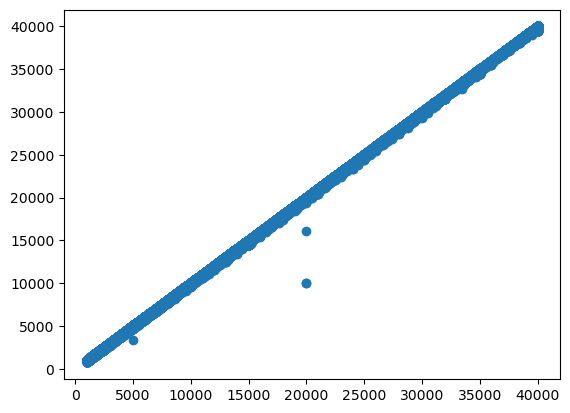

In [23]:
%matplotlib inline
plt.scatter(trn['loan_amnt'],trn['funded_amnt_inv'])

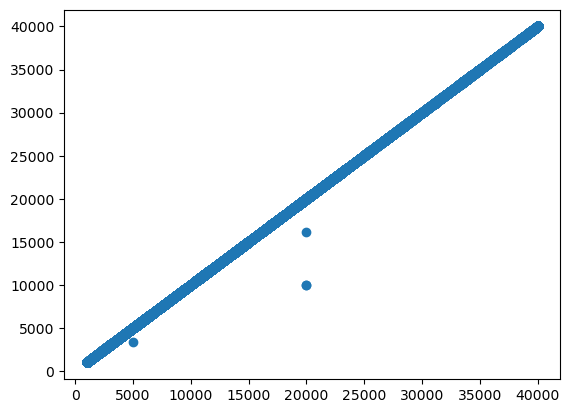

In [24]:
%matplotlib inline
plt.scatter(trn['loan_amnt'],trn['funded_amnt'])

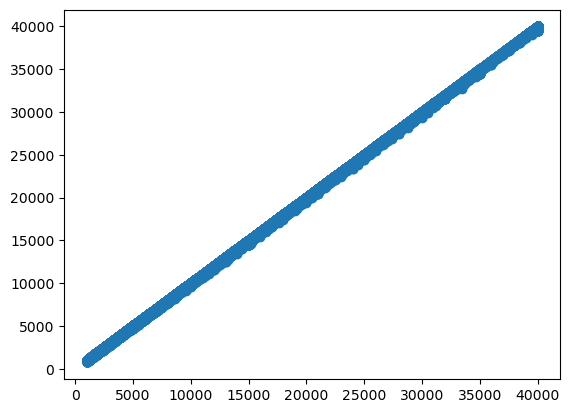

In [25]:
%matplotlib inline
plt.scatter(trn['funded_amnt'],trn['funded_amnt_inv'])

In [26]:
trn[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999999,0.999994
funded_amnt,0.999999,1.000000,0.999995
funded_amnt_inv,0.999994,0.999995,1.000000


#### Feature with invs - remove invs 
Very high correlation between out_prncp,total_pymnt, funded_amnt and their _inv counterparts

In [27]:
print(trn[['out_prncp','out_prncp_inv']].corr())
print(trn[['total_pymnt','total_pymnt_inv']].corr())
print(trn[['funded_amnt','funded_amnt_inv']].corr())

               out_prncp  out_prncp_inv
out_prncp       1.000000       0.999999
out_prncp_inv   0.999999       1.000000
                 total_pymnt  total_pymnt_inv
total_pymnt         1.000000         0.999996
total_pymnt_inv     0.999996         1.000000
                 funded_amnt  funded_amnt_inv
funded_amnt         1.000000         0.999995
funded_amnt_inv     0.999995         1.000000


### Investigate object/categorical features that have few unique values
Use Chi-square to test significance. Cramer's V for strength of association (<0.1 weak association, >0.5 strong association)

Null hypothesis: There is no significant relationship between two categorical variables.

- term
- grade & sub_grade
- ~verification_status~
- ~pymnt_plan~
- ~initial_list_status~
- ~application_type~
- ~hardship_flag~
- ~disbursement_method~
- debt_settlement_flag

time_coln = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']


'emp_title', 'emp_length', 'home_ownership', 'purpose', 'title', 'zip_code', 'addr_state'
       

In [28]:
coln_obj = col_types[col_types['dtypes']=='O']['index'] # object types may affect model training
trn[coln_obj];

In [29]:
coln_obj

3                      term
6                     grade
7                 sub_grade
8                 emp_title
9                emp_length
10           home_ownership
12      verification_status
13                  issue_d
14              loan_status
15               pymnt_plan
16                  purpose
17                    title
18                 zip_code
19               addr_state
22         earliest_cr_line
31      initial_list_status
41             last_pymnt_d
43             next_pymnt_d
44       last_credit_pull_d
48         application_type
104           hardship_flag
105     disbursement_method
106    debt_settlement_flag
Name: index, dtype: object

In [30]:
# check unique values in object columns
for col in trn[coln_obj]:
    print(trn[coln_obj][col].unique())

[' 36 months' ' 60 months']
['A' 'E' 'C' 'B' 'D' 'G' 'F']
['A5' 'E5' 'C5' 'C2' 'B1' 'C1' 'C3' 'B2' 'D2' 'D3' 'B3' 'A2' 'E3' 'G1'
 'B4' 'D4' 'B5' 'E2' 'E4' 'D1' 'A4' 'D5' 'C4' 'A1' 'F2' 'F1' 'E1' 'F4'
 'F5' 'A3' 'G2' 'F3' 'G4' 'G3' 'G5']
[nan 'CNC Robotic Welder' 'Information Tech II' ... 'Acft mechanic'
 'Content Review ' 'BABYSITTER']
[nan '10+ years' '1 year' '< 1 year' '4 years' '6 years' '3 years'
 '2 years' '7 years' '8 years' '5 years' '9 years']
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']
['Verified' 'Source Verified' 'Not Verified']
['Nov-2018' 'Oct-2018' 'Sep-2018' 'Aug-2018' 'Jul-2018' 'Jun-2018'
 'May-2018' 'Apr-2018' 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2016'
 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016' 'Mar-2016'
 'Feb-2016' 'Jan-2016' 'Dec-2016' 'Nov-2016' 'Oct-2016' 'Dec-2015'
 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015' 'Jun-2015'
 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015' 'Mar-2017'
 'Feb-2017' 'Jan-2017' 'Sep-2017' 'Aug-2017' 'Jul-2017' 

['Apr-2011' 'Nov-2008' 'Jun-2006' 'Jun-2005' 'Feb-2013' 'Aug-2003'
 'Feb-2005' 'Oct-2007' 'Aug-2012' 'Sep-1993' 'Nov-2000' 'Sep-2007'
 'Dec-2000' 'Dec-1989' 'Oct-2012' 'Jul-1995' 'Dec-1999' 'Aug-2001'
 'Aug-1990' 'Jan-2012' 'Mar-2006' 'Nov-2005' 'Aug-2015' 'Jan-2010'
 'Apr-2008' 'Aug-2005' 'Oct-2008' 'Sep-2002' 'Oct-2004' 'Apr-1988'
 'Dec-2005' 'Apr-2006' 'Feb-2007' 'Sep-2008' 'Jun-1999' 'Oct-1992'
 'Jan-1996' 'Jul-2008' 'Nov-2001' 'Jun-2003' 'Jan-1977' 'Oct-2009'
 'Jul-2013' 'Oct-1985' 'Jul-1989' 'Nov-1980' 'Jul-2010' 'May-1978'
 'Aug-2011' 'Jun-1995' 'Sep-2000' 'May-2006' 'Aug-2009' 'Dec-2013'
 'Sep-2006' 'Jun-1977' 'Dec-1993' 'May-2002' 'Nov-2006' 'Oct-2014'
 'Apr-2009' 'Oct-1996' 'Dec-2003' 'Oct-2003' 'Aug-2008' 'Dec-2010'
 'Mar-2000' 'Apr-2015' 'Feb-2006' 'Aug-1996' 'Apr-2005' 'Apr-1975'
 'Jun-2001' 'Jun-1997' 'Oct-2010' 'May-2008' 'May-2010' 'Aug-2006'
 'Jan-2009' 'Jan-1997' 'Oct-1998' 'Jul-2005' 'May-1986' 'Jul-1990'
 'Jul-1996' 'Apr-1998' 'May-2003' 'Nov-1999' 'Oct-2005' 'Nov-2

['w' 'f']
[nan 'Dec-2018' 'Nov-2018' 'Jan-2019' 'Oct-2018' 'Sep-2018' 'Aug-2018'
 'Feb-2019' 'Jul-2018' 'Jun-2018' 'May-2018' 'Apr-2018' 'Mar-2018'
 'Feb-2018' 'Jan-2018' 'Nov-2017' 'May-2017' 'Aug-2017' 'Jun-2017'
 'Apr-2017' 'Mar-2017' 'Sep-2017' 'Dec-2016' 'Jan-2017' 'Jul-2017'
 'Oct-2017' 'Dec-2017' 'Nov-2016' 'Feb-2017' 'Oct-2016' 'Sep-2016'
 'Aug-2016' 'Jul-2016' 'Jun-2016' 'May-2016' 'Apr-2016' 'Mar-2016'
 'Feb-2016' 'Jan-2016' 'Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015'
 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015'
 'Feb-2015' 'Dec-2014' 'Mar-2014' 'Jul-2014' 'May-2014' 'Jan-2015'
 'Nov-2014' 'Aug-2014' 'Oct-2014' 'Sep-2014' 'Apr-2014' 'Jun-2014'
 'Feb-2014' 'Jan-2014' 'Dec-2013' 'Nov-2013' 'Oct-2013' 'Sep-2013'
 'Aug-2013' 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013'
 'Feb-2013']
[nan 'Mar-2019' 'Feb-2019' 'Apr-2019' 'Dec-2018' 'Sep-2018' 'Aug-2018'
 'Feb-2018']
['Jan-2019' 'Feb-2019' 'Nov-2018' 'Dec-2018' 'Oct-2018' 'Sep-2018'
 'Aug-2018' 'Jul-2

#### term
may remove

In [31]:
trn[['term','loan_status_dv']].value_counts(normalize=True)

term        loan_status_dv
 36 months  0                 0.671751
 60 months  0                 0.255169
 36 months  1                 0.044452
 60 months  1                 0.028627
dtype: float64

In [32]:
data = pd.crosstab(trn['term'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 8255.671704129067
p-value: 0.0
Cramer_V: 0.06722133680220137


#### grade & sub_grade
top default grade loan C, D, B; stronger association in sub_grade

In [33]:
trn[['loan_status_dv','grade']].value_counts(normalize=True).sort_index()

loan_status_dv  grade
0               A        0.195649
                B        0.284433
                C        0.264657
                D        0.121461
                E        0.045292
                F        0.012139
                G        0.003288
1               A        0.003694
                B        0.013987
                C        0.023561
                D        0.016711
                E        0.009927
                F        0.003937
                G        0.001264
dtype: float64

In [34]:
trn[['loan_status_dv', 'sub_grade']].value_counts(normalize=True).sort_values(
    ascending=False).to_frame().reset_index().sort_values(['loan_status_dv', 0], ascending=False).tail(40)

,loan_status_dv,sub_grade,0
65,1,A1,0.000362
66,1,G2,0.000292
67,1,G3,0.000225
68,1,G4,0.000196
69,1,G5,0.000165
0,0,C1,0.060506
1,0,B4,0.059312
2,0,B5,0.058796
3,0,B1,0.055604
4,0,B2,0.055375


In [35]:
data = pd.crosstab(trn['grade'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 65545.81092960323
p-value: 0.0
Cramer_V: 0.18940364844059815


In [36]:
data = pd.crosstab(trn['sub_grade'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 67869.88355902435
p-value: 0.0
Cramer_V: 0.1927322635693128


#### verification_status
Remove

In [37]:
trn[['verification_status','loan_status_dv']].value_counts(normalize=True).sort_index()

verification_status  loan_status_dv
Not Verified         0                 0.317170
                     1                 0.015720
Source Verified      0                 0.367329
                     1                 0.030374
Verified             0                 0.242421
                     1                 0.026986
dtype: float64

In [38]:
data = pd.crosstab(trn['verification_status'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 11450.811364192554
p-value: 0.0
Cramer_V: 0.07916514292617349


#### pymnt_plan
Remove, only 0.0002% people (3.65) on payment plan, too few samples, chi-square test p-value = 1.0, Cramer's V weak

In [39]:
trn[['pymnt_plan','loan_status_dv']].value_counts().sort_index()

pymnt_plan  loan_status_dv
n           0                 1693596
            1                  133526
y           0                       3
dtype: int64

In [40]:
data = pd.crosstab(trn['pymnt_plan'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 0.0
p-value: 1.0
Cramer_V: 0.0003597944660247935


#### initial_list_status
Remove

In [41]:
trn[['initial_list_status','loan_status_dv']].value_counts(normalize=True)

initial_list_status  loan_status_dv
w                    0                 0.665610
f                    0                 0.261310
w                    1                 0.045061
f                    1                 0.028019
dtype: float64

In [42]:
data = pd.crosstab(trn['initial_list_status'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 6199.4102537662275
p-value: 0.0
Cramer_V: 0.05825166540995237


#### application_type
Remove

In [43]:
trn[['application_type','loan_status_dv']].value_counts(normalize=True)

application_type  loan_status_dv
Individual        0                 0.872361
                  1                 0.071434
Joint App         0                 0.054559
                  1                 0.001646
dtype: float64

In [44]:
data = pd.crosstab(trn['application_type'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 3079.3552424698796
p-value: 0.0
Cramer_V: 0.04105764713425525


#### hardship_flag
Remove. hardship_flag only has 9 'Y' record paid-off

In [45]:
trn[['hardship_flag','loan_status_dv']].value_counts()

hardship_flag  loan_status_dv
N              0                 1693590
               1                  133526
Y              0                       9
dtype: int64

In [46]:
data = pd.crosstab(trn['hardship_flag'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 0.040802357461754826
p-value: 0.8399199026518551
Cramer_V: 0.0006231833186590913


#### disbursement_method
Remove

In [47]:
trn[['disbursement_method','loan_status_dv']].value_counts(normalize=True)

disbursement_method  loan_status_dv
Cash                 0                 0.889524
                     1                 0.072716
DirectPay            0                 0.037396
                     1                 0.000364
dtype: float64

In [48]:
data = pd.crosstab(trn['disbursement_method'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 4259.089020684353
p-value: 0.0
Cramer_V: 0.048286290564561414


#### debt_settlement_flag
Def.: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

Expecting only Y in charged-off (0) category. 23 records maybe misclassified? 

may keep

In [49]:
trn[['debt_settlement_flag','loan_status_dv']].value_counts()

debt_settlement_flag  loan_status_dv
N                     0                 1693576
                      1                  116599
Y                     1                   16927
                      0                      23
dtype: int64

In [50]:
data = pd.crosstab(trn['debt_settlement_flag'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

Chi_square statistic: 216352.5380307116
p-value: 0.0
Cramer_V: 0.34412062953067346


### Rest of objects except time
~'emp_title'~, 'emp_length', ~'home_ownership'~, 'purpose', ~'title'~, ~'zip_code'~, 'addr_state'

Remove `title` due to large unique values and are designated by borrowers, use 'purpose'

A lot of 'managers' in default categories, remove `emp_title` (due to large unique values 401006) for now, may need text mining and add feature in the future

Remove `home_ownership` due to lower Cramer_V score. 'Own'ing a home would still have default results. 'Any' and 'None' does not make sense. Need more clarifications on the feature.

Remove `zip_code` and use addr_state instead to avoid potential overfitting.

In [51]:
# Title vs Purpose
print(f"Unique 'title' values: {len(trn['title'].unique())}") 
trn['purpose'].unique() # 14 loan categories
# trn[trn['purpose']=='debt_consolidation']['title'].unique()

Unique 'title' values: 29127


array(['debt_consolidation', 'home_improvement', 'major_purchase',
       'credit_card', 'moving', 'medical', 'small_business', 'other',
       'house', 'car', 'vacation', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

Unique emp_title: 401006


<AxesSubplot: >

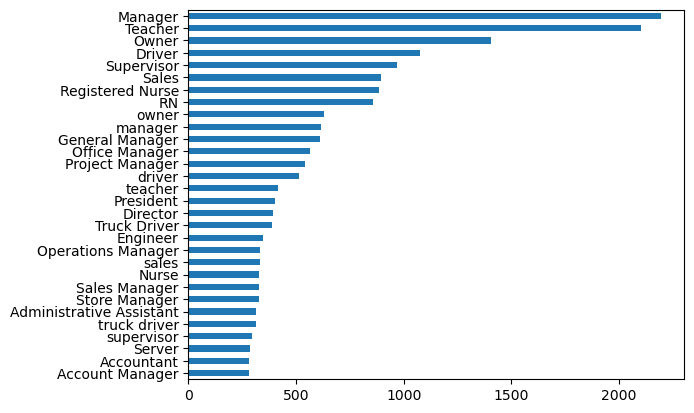

In [52]:
# emp_title
print(f"Unique emp_title: {len(trn['emp_title'].unique())}")
trn[trn['loan_status_dv']==1]['emp_title'].value_counts().head(30).sort_values().plot(kind = 'barh')

In [53]:
print(trn[['home_ownership','loan_status_dv']].value_counts().sort_index())

data = pd.crosstab(trn['home_ownership'],trn['loan_status_dv'])
print(f"Chi_square statistic: {stats.chi2_contingency(data)[0]}")
print(f"p-value: {stats.chi2_contingency(data)[1]}")

# [2]: degree of freedom. [3]: expected contingency table

X2 = stats.chi2_contingency(data,correction=False)[0]
N = np.sum(np.sum(data))
minimum_dimension = min(data.shape)-1
Cramer_V = np.sqrt((X2/N) / minimum_dimension)

print(f'Cramer_V: {Cramer_V}')

home_ownership  loan_status_dv
ANY             0                    827
                1                     31
MORTGAGE        0                 851184
                1                  57028
NONE            0                      4
OWN             0                 192091
                1                  14901
RENT            0                 649493
                1                  61566
dtype: int64
Chi_square statistic: 3354.5556657006987
p-value: 0.0
Cramer_V: 0.04284827784782682


In [54]:
trn[['emp_length', 'purpose', 'addr_state']]

for col in trn[['emp_length', 'purpose', 'addr_state']]:
    print(trn[['emp_length', 'purpose', 'addr_state']][col].unique())

[nan '10+ years' '1 year' '< 1 year' '4 years' '6 years' '3 years'
 '2 years' '7 years' '8 years' '5 years' '9 years']
['debt_consolidation' 'home_improvement' 'major_purchase' 'credit_card'
 'moving' 'medical' 'small_business' 'other' 'house' 'car' 'vacation'
 'renewable_energy' 'wedding' 'educational']
['AZ' 'IL' 'VA' 'TX' 'MN' 'NC' 'ME' 'SC' 'MA' 'MI' 'DE' 'OK' 'CA' 'LA'
 'NJ' 'TN' 'MD' 'WA' 'NE' 'UT' 'PA' 'FL' 'KS' 'IN' 'NY' 'MO' 'GA' 'KY'
 'NV' 'ID' 'OH' 'AL' 'MS' 'CO' 'WY' 'CT' 'WI' 'HI' 'VT' 'DC' 'NM' 'WV'
 'OR' 'NH' 'AR' 'RI' 'MT' 'ND' 'SD' 'AK' 'IA']


## Object features selected 
- term
- grade 
- sub_grade
- debt_settlement_flag
- emp_length 
- purpose
- addr_state

`coln_obj_drop`: features to drop except time object

- Investigate further:  time_coln = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']


## Int & float features removed
- policy_code
- funded_amnt
- funded_amnt_inv
- out_prncp_inv
- total_pymnt_inv

## Correlation matrix 
Remove correlation >=0.95

In [55]:
# drop features determined in section above(2.2 Feature understanding & selection), object features drop automatically
trn_corr = trn.drop(columns=['loan_status_dv','policy_code', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'])
print(f'Number of features in correlation matrix: {len(trn_corr.corr().columns)}')
trn_corr.corr()
# trn_corr.corr().to_csv('feature_correlation_intfloat.csv') # Pearson

/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_18170/1936296587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Number of features in correlation matrix: {len(trn_corr.corr().columns)}')


Number of features in correlation matrix: 79


/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_18170/1936296587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trn_corr.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.082341,0.945845,0.185775,0.041013,-0.013667,-0.025355,-0.009848,0.016203,0.179580,...,-0.024684,-0.029042,0.092727,0.023301,-0.089215,0.005392,0.337112,0.276982,0.375120,0.207718
int_rate,0.082341,1.000000,0.107159,-0.050220,0.122082,0.058910,0.190361,-0.045079,-0.015488,-0.016895,...,0.033986,0.178248,-0.082637,0.273078,0.058372,0.014725,-0.124277,0.005292,-0.242831,-0.003028
installment,0.945845,0.107159,1.000000,0.179339,0.042174,-0.001969,0.000396,-0.019527,0.000866,0.168642,...,-0.018145,-0.006884,0.073559,0.045915,-0.080206,0.012494,0.301746,0.259743,0.339165,0.190761
annual_inc,0.185775,-0.050220,0.179339,1.000000,-0.078736,0.023904,0.020290,-0.029375,-0.055724,0.088342,...,0.003282,0.032851,-0.004040,-0.001499,-0.027034,0.023081,0.250865,0.196331,0.168850,0.166723
dti,0.041013,0.122082,0.042174,-0.078736,1.000000,-0.013665,-0.007695,0.014013,0.059119,0.180550,...,-0.013028,0.043529,0.065196,0.102471,-0.016256,-0.022274,0.032150,0.192829,0.038091,0.219001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,0.005392,0.014725,0.012494,0.023081,-0.022274,0.010692,0.017245,0.003765,-0.305589,-0.007073,...,0.002258,0.017837,-0.032971,-0.008620,0.031783,1.000000,-0.000945,-0.001974,-0.027011,0.004670
tot_hi_cred_lim,0.337112,-0.124277,0.301746,0.250865,0.032150,0.055235,0.032367,-0.077674,-0.001119,0.299260,...,0.003130,0.103422,0.026158,-0.007989,-0.102024,-0.000945,1.000000,0.519901,0.405493,0.424652
total_bal_ex_mort,0.276982,0.005292,0.259743,0.196331,0.192829,0.026393,0.038615,-0.020482,-0.012518,0.405879,...,0.013683,0.119146,0.062813,0.072972,-0.076108,-0.001974,0.519901,1.000000,0.297139,0.876985
total_bc_limit,0.375120,-0.242831,0.339165,0.168850,0.038091,-0.079087,-0.001718,0.005908,0.022637,0.387834,...,-0.059552,0.053789,0.218477,-0.211977,-0.146394,-0.027011,0.405493,0.297139,1.000000,0.143123


Delete ones with more NaNs 


'loan_amnt','installment' corr: 0.945845
- Larger loan amount would have larger installment plan to pay off loan amount. Remove `installment`


'num_sats','open_acc' corr: 0.998966
- satisfactory accounts is anoalogus to open account/lines. Remove `open_acc`


'total_pymnt','total_rec_prncp' corr: 0.970633
- remove `total_rec_prncp`, used total payment to see funds received 


'recoveries','collection_recovery_fee' corr: 0.976459
- if there is recovery and collection_recovery_fee. remove `collection_recovery_fee`

'tot_hi_cred_lim','tot_cur_bal' corr: 0.975565
- higher balance typically has higher credit limit, it is harder to obtain higher credit limit (already approved), thus remove `tot_cur_bal`

'total_bal_il', 'total_il_high_credit_limit' corr: 0.951876
- higher balance typically has higher credit limit, it is harder to obtain higher credit limit (already approved), thus remove `total_bal_il`, also total bal_il has more NAs


'num_rev_tl_bal_gt_0','num_actv_rev_tl' corr: 0.983753
- analogus, more risk with trades with balance >0, remove `num_actv_rev_tl`


In [56]:
trn.iloc[trn['recoveries'][trn['recoveries']==0].index].value_counts('loan_status_dv') 
#1739353-87772

loan_status_dv
0    1693599
1      45754
dtype: int64

In [57]:
# once there is recoveries, loan default = 0 
trn.iloc[trn['recoveries'][trn['recoveries']>0].index].value_counts('loan_status_dv') 

loan_status_dv
1    87772
dtype: int64

## Summaries -> trn_dropEDA (85 features)
Kept original loan_status column

In [58]:
coln_obj_drop = [i for i in coln_obj.tolist() if i not in ['term', 'grade', 'sub_grade', 'debt_settlement_flag', 'emp_length', 'purpose', 'addr_state',
                                                           'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]
trn_dropEDA = trn.copy().drop(columns=coln_obj_drop+['policy_code', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv']+['installment', 'open_acc', 'total_rec_prncp', 'collection_recovery_fee', 'tot_cur_bal', 'total_bal_il', 'num_actv_rev_tl'])
    # droped onjects, int_float highly correlated features
print(f'train_csv features: {train.shape[1]}')
print(f'trn features after encoding dv and remove >90% missing data column: {trn.shape[1]}')
print(f'trn_dropEDA features after EDA: {trn_dropEDA.shape[1]}')
print(f'Features removed after preminliary EDA: {train.shape[1]-trn_dropEDA.shape[1]}')

#trn_dropEDA.to_csv('trn_dropEDA.csv')

train_csv features: 145
trn features after encoding dv and remove >90% missing data column: 108
trn_dropEDA features after EDA: 85
Features removed after preminliary EDA: 60


In [59]:
trn_dropEDA_na = trn_dropEDA.isna().sum().sort_values(ascending=False)
print(f'Features with NAs after preminliary EDA: {len(trn_dropEDA_na[trn_dropEDA_na>0])}')
trn_dropEDA_na[trn_dropEDA_na>0]

Features with NAs after preminliary EDA: 34


mths_since_last_record            1532158
mths_since_recent_bc_dlq          1396890
mths_since_last_major_derog       1346127
mths_since_recent_revol_delinq    1216894
next_pymnt_d                       998994
mths_since_last_delinq             932516
il_util                            815757
mths_since_rcnt_il                 679739
all_util                           642907
open_acc_6m                        642717
total_cu_tl                        642717
inq_last_12m                       642717
open_rv_24m                        642716
open_act_il                        642716
max_bal_bc                         642716
open_il_24m                        642716
open_il_12m                        642716
inq_fi                             642716
open_rv_12m                        642716
mths_since_recent_inq              206528
emp_length                         119754
num_tl_120dpd_2m                    68149
mo_sin_old_il_acct                  56895
bc_util                           

# Baseline model with int, float only - trn_dropEDA without object and NA


## Define baseline model function and score


In [60]:
def baseline_log(df) :
    '''
    df: e.g trn_dropEDA fed into training model.
    
    '''
    coln_types_EDA = df.dtypes.to_frame('dtypes').reset_index()
    
    df = df.drop(columns=coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()) # drop obj.
    # Drop the columns with NA where at least one element is missing.
    X = df.drop(columns='loan_status_dv').dropna(axis='columns') 
    y = df.dropna(axis='columns')[['loan_status_dv']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    # Fit 
    base_log = LogisticRegression()
    base_log.fit(X_train, np.ravel(y_train))

    # Coefficient
    # print(base_log.coef_)
    print(pd.DataFrame({'coeff': base_log.coef_[0]}, 
                 index=X_train.columns).sort_values(by='coeff',ascending=False).head(20))
    
    # Predicted probability
    y_pred = base_log.predict(X_test)
    y_pred_prob = pd.DataFrame(base_log.predict_proba(X_test),
                        columns=base_log.classes_)

    
    # Score
    print(classificationSummary(y_test, y_pred, class_names=base_log.classes_))
    AUC_score = roc_auc_score(y_test, y_pred)
    print(f'AUC_score: {AUC_score}')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('Accuracy: {}'.format((tn+tp)/(tn+fp+fn+tp)))
    print('Precision:   {}'.format(tp/(fp+tp))) 
    print('Recall:     {}'.format(tp/(tp+fn)))
    print('Specificity: {}'.format(tn/(tn+fp)))
    print('F1 SCORE for Default:  {}'.format(2*(tp/(fp+tp))*(tp/(tp+fn))/((tp/(fp+tp))+(tp/(tp+fn)))))

## Prepare base_log training dataset 

In [61]:
coln_types_EDA = trn_dropEDA.dtypes.to_frame('dtypes').reset_index()
print(coln_types_EDA['dtypes'].value_counts())

float64    70
object     12
int64       3
Name: dtypes, dtype: int64


In [62]:
print(coln_types_EDA[coln_types_EDA['dtypes']=='int64'])
print(coln_types_EDA[coln_types_EDA['dtypes']=='float64'])
print(coln_types_EDA[coln_types_EDA['dtypes']=='O']['index']) # object types may affect model training

             index dtypes
0        loan_amnt  int64
17       revol_bal  int64
84  loan_status_dv  int64
                         index   dtypes
2                     int_rate  float64
6                   annual_inc  float64
10                         dti  float64
11                 delinq_2yrs  float64
13              inq_last_6mths  float64
..                         ...      ...
78                   tax_liens  float64
79             tot_hi_cred_lim  float64
80           total_bal_ex_mort  float64
81              total_bc_limit  float64
82  total_il_high_credit_limit  float64

[70 rows x 2 columns]
1                     term
3                    grade
4                sub_grade
5               emp_length
7                  issue_d
8                  purpose
9               addr_state
12        earliest_cr_line
25            last_pymnt_d
27            next_pymnt_d
28      last_credit_pull_d
83    debt_settlement_flag
Name: index, dtype: object


In [63]:
# obj to remove: 
# coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist()
base_log_trn = trn_dropEDA.drop(columns=coln_types_EDA[coln_types_EDA['dtypes']=='O']['index'].tolist())

In [64]:
base_log_trn.shape

(1827125, 73)

In [65]:
###### optional to run #########
# sample a 3_pct base_log_trndataset to investigate 

#base_log_trn_3pct = base_log_trn.sample(n = int(trn.shape[0]*0.03), replace = False, random_state=2) # 91356
#base_log_trn_3pct.to_csv('base_log_trn_3pct.csv')
#base_log_trn_3pct.shape

In [66]:
# base_log_trn dropped object/categorical values
print('Base_log_trn dropped object/categorical values: ')
[i for i in  trn_dropEDA.columns.tolist() if i not in base_log_trn.columns.tolist()]

Base_log_trn dropped object/categorical values: 


['term',
 'grade',
 'sub_grade',
 'emp_length',
 'issue_d',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'debt_settlement_flag']

## Model setup and train

In [67]:
# Use non-NaN 47 features infloat, exclude object
#### use sample?:  base_log_trn_3pct

# base_log_trn
X = base_log_trn.drop(columns='loan_status_dv').dropna(axis='columns') # Drop the columns with NA where at least one element is missing.
y = base_log_trn.dropna(axis='columns')[['loan_status_dv']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit 
base_log = LogisticRegression()
base_log.fit(X_train, np.ravel(y_train))

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# Parameters of model
print(base_log.get_params())

# Intercept
print('intercept ', base_log.intercept_[0])
print('classes', base_log.classes_) 

# Coefficient
# print(base_log.coef_)
pd.DataFrame({'coeff': base_log.coef_[0]}, 
             index=X_train.columns).sort_values(by='coeff',ascending=False).head(20)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
intercept  -2.230507172638748e-06
classes [0 1]


,coeff
total_rec_int,6.334406e-03
loan_amnt,5.668060e-03
recoveries,3.802065e-03
total_rec_late_fee,2.671066e-05
revol_bal,1.948013e-05
delinq_amnt,2.268853e-06
total_bal_ex_mort,2.227976e-06
tot_hi_cred_lim,4.991041e-07
tax_liens,4.635240e-08
acc_now_delinq,1.128793e-08


## Features dropped 

In [69]:
print(f'train columns: {len(train.columns)}')
print(f'trn columns: {len(trn.columns)}')
print(f'trn_dropEDA columns: {len(trn_dropEDA.columns)}')
print(f'base_log_trn columns: {len(base_log_trn.columns)}')
print(f'X columns: {len(X.columns)}')

print(f'{len(train.columns)-len(trn.columns)} features removed due to >90% missing values. \n{len(trn.columns)-len(trn_dropEDA.columns)} features removed after preliminary EDA. \n{len(trn_dropEDA.columns)-len(base_log_trn.columns)} features removed for baseline log model. \n{len(base_log_trn.columns)-len(X.columns)} features with NaN log model training.')

train columns: 145
trn columns: 108
trn_dropEDA columns: 85
base_log_trn columns: 73
X columns: 41
37 features removed due to >90% missing values. 
23 features removed after preliminary EDA. 
12 features removed for baseline log model. 
32 features with NaN log model training.


## Predicted results


In [70]:
# Predicted 
y_pred = base_log.predict(X_test)
y_pred_prob = pd.DataFrame(base_log.predict_proba(X_test),
                    columns=base_log.classes_)


# X_pred = base_log.predict(X_train)
# X_pred_prob = pd.DataFrame(base_log.predict_proba(X_train),
#                   columns=base_log.classes_)


#print(X_pred_prob.describe())
#print(y_pred_prob.describe())

In [71]:
y_test.value_counts()

loan_status_dv
0                 338854
1                  26571
dtype: int64

In [72]:
y_pred = pd.DataFrame(y_pred,columns = ['loan_status_pred'])
y_pred.value_counts()

loan_status_pred
0                   339193
1                    26232
dtype: int64

In [73]:
# Compare results use machine learning and, y_test (true_value)
print(pd.concat([y_test.reset_index(drop = True), y_pred], axis = 1))

        loan_status_dv  loan_status_pred
0                    0                 0
1                    0                 0
2                    1                 1
3                    0                 0
4                    0                 0
...                ...               ...
365420               0                 0
365421               0                 0
365422               0                 0
365423               1                 1
365424               0                 0

[365425 rows x 2 columns]


## Score

In [74]:
AUC_score = roc_auc_score(y_test, y_pred)
print(f'ROC_AUC score: {AUC_score}')

ROC_AUC score: 0.9936005717831033


In [75]:
classificationSummary(y_test, y_pred, class_names=base_log.classes_)  

Confusion Matrix (Accuracy 0.9991)

       Prediction
Actual      0      1
     0 338853      1
     1    340  26231


In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('Accuracy: {}'.format((tn+tp)/(tn+fp+fn+tp)))
print('Precision:   {}'.format(tp/(fp+tp))) 
print('Recall:     {}'.format(tp/(tp+fn)))
print('Specificity: {}'.format(tn/(tn+fp)))
print('F1 SCORE for Default:  {}'.format(2*(tp/(fp+tp))*(tp/(tp+fn))/((tp/(fp+tp))+(tp/(tp+fn)))))

Accuracy: 0.9990668399808442
Precision:   0.999961878621531
Recall:     0.9872040946896993
Specificity: 0.9999970488765073
F1 SCORE for Default:  0.9935420335965759


In [77]:
# precision, recall, fbeta_score and support
precision_recall_fscore_support(y_test, y_pred, 
                                labels=[0, 1])

# precision    recall  f1-score   support
target_names = ['paid off', 'charged off']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    paid off       1.00      1.00      1.00    338854
 charged off       1.00      0.99      0.99     26571

    accuracy                           1.00    365425
   macro avg       1.00      0.99      1.00    365425
weighted avg       1.00      1.00      1.00    365425



## AUC ROC 

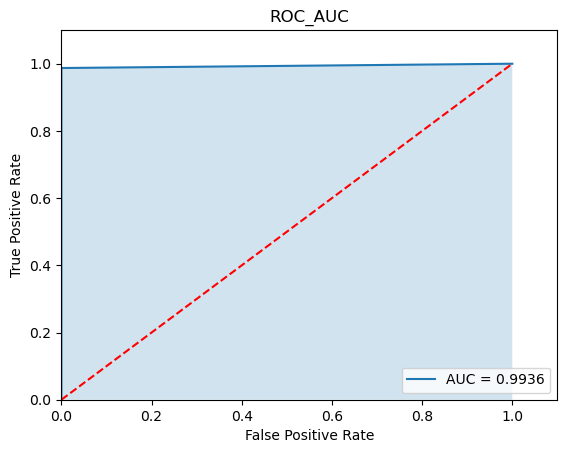

In [78]:
%matplotlib inline
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_test['loan_status_dv'], y_pred['loan_status_pred'], pos_label=1)

plt.title('ROC_AUC')
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % AUC_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr, 0, tpr, alpha=0.2)
plt.show()

# Time data vs loan status
object time data and float 'mths', 'mo' data 

## EDA on time features

 'mo_sin_old_il_acct',	Months since oldest bank installment account opened
 
 'mo_sin_old_rev_tl_op',	Months since oldest revolving account opened
 
 'mo_sin_rcnt_rev_tl_op',	Months since most recent revolving account opened
 
 'mo_sin_rcnt_tl',	Months since most recent account opened
 
 'mort_acc',	Number of mortgage accounts.
 
 'mths_since_last_delinq',	The number of months since the borrower's last delinquency.
 
 'mths_since_last_major_derog',	Months since most recent 90-day or worse rating
 
 'mths_since_last_record',	The number of months since the last public record.
 
 'mths_since_rcnt_il',	Months since most recent installment accounts opened
 
 'mths_since_recent_bc',	Months since most recent bankcard account opened.
 
 'mths_since_recent_bc_dlq',	Months since most recent bankcard delinquency
 
 'mths_since_recent_inq',	Months since most recent inquiry.
 
 'mths_since_recent_revol_delinq',	Months since most recent revolving delinquency.
 
 ['mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d']

,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
count,1.770230e+06,1.827125e+06,1.827125e+06,1.827125e+06
mean,1.259513e+02,1.821876e+02,1.416740e+01,8.366697e+00
std,5.331117e+01,9.724242e+01,1.767543e+01,9.242404e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.600000e+01,1.170000e+02,4.000000e+00,3.000000e+00
50%,1.300000e+02,1.640000e+02,8.000000e+00,6.000000e+00
75%,1.540000e+02,2.330000e+02,1.700000e+01,1.100000e+01
max,9.990000e+02,9.010000e+02,5.470000e+02,3.680000e+02


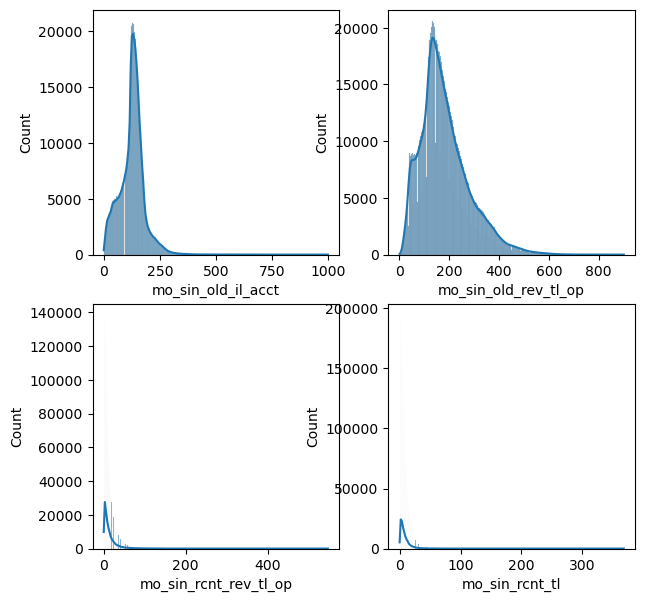

In [79]:
%matplotlib inline
# EDA on months data
# skew to the right
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=trn_dropEDA, x="mo_sin_old_il_acct", kde=True, ax=axs[0, 0])
sns.histplot(data=trn_dropEDA, x="mo_sin_old_rev_tl_op", kde=True, ax=axs[0, 1])
sns.histplot(data=trn_dropEDA, x="mo_sin_rcnt_rev_tl_op", kde=True, ax=axs[1, 0])
sns.histplot(data=trn_dropEDA, x="mo_sin_rcnt_tl", kde=True, ax=axs[1, 1])

trn_dropEDA[['mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']].describe()

In [80]:
baseline_log(trn_dropEDA[['mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl','loan_status_dv']])
# AUC score low

                          coeff
mo_sin_old_rev_tl_op  -0.001127
mo_sin_rcnt_rev_tl_op -0.006814
mo_sin_rcnt_tl        -0.019356
Confusion Matrix (Accuracy 0.9273)

       Prediction
Actual      0      1
     0 338854      0
     1  26571      0
None
AUC_score: 0.5
Accuracy: 0.927287405076281
Precision:   nan
Recall:     0.0
Specificity: 1.0
F1 SCORE for Default:  nan


/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_18170/3116394442.py:38: RuntimeWarning: invalid value encountered in long_scalars
  print('Precision:   {}'.format(tp/(fp+tp)))
/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_18170/3116394442.py:41: RuntimeWarning: invalid value encountered in long_scalars
  print('F1 SCORE for Default:  {}'.format(2*(tp/(fp+tp))*(tp/(tp+fn))/((tp/(fp+tp))+(tp/(tp+fn)))))


,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,loan_status_dv
count,894609.000000,480998.000000,294967.000000,1.147386e+06,1.807887e+06,430235.000000,1.620597e+06,610231.000000,1.827125e+06
mean,34.565229,44.238080,72.461601,2.133173e+01,2.507680e+01,39.324753,7.090876e+00,35.804118,7.307984e-02
std,21.898461,21.544932,26.114828,2.607263e+01,3.256258e+01,22.625528,5.979832e+00,22.315879,2.602676e-01
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,16.000000,27.000000,55.000000,7.000000e+00,6.000000e+00,21.000000,2.000000e+00,17.000000,0.000000e+00
50%,31.000000,44.000000,74.000000,1.300000e+01,1.400000e+01,37.000000,6.000000e+00,33.000000,0.000000e+00
75%,50.000000,62.000000,92.000000,2.400000e+01,3.000000e+01,57.000000,1.100000e+01,51.000000,0.000000e+00
max,226.000000,226.000000,127.000000,5.110000e+02,6.610000e+02,195.000000,2.500000e+01,197.000000,1.000000e+00


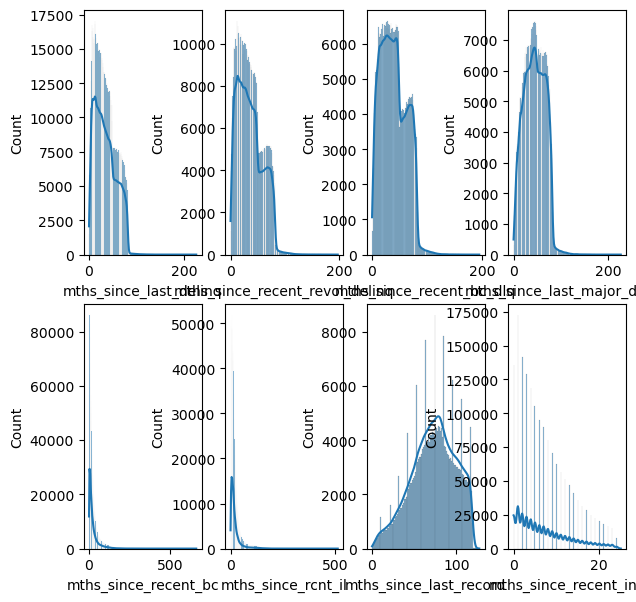

In [81]:
%matplotlib inline
# EDA on months data
fig, axs = plt.subplots(2, 4, figsize=(7, 7))

sns.histplot(data=trn_dropEDA, x="mths_since_last_delinq", kde=True, ax=axs[0, 0])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_revol_delinq", kde=True, ax=axs[0, 1])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_bc_dlq", kde=True, ax=axs[0, 2])
sns.histplot(data=trn_dropEDA, x="mths_since_last_major_derog", kde=True, ax=axs[0, 3])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_bc", kde=True, ax=axs[1, 0])
sns.histplot(data=trn_dropEDA, x="mths_since_rcnt_il", kde=True, ax=axs[1, 1])
sns.histplot(data=trn_dropEDA, x="mths_since_last_record", kde=True, ax=axs[1, 2])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_inq", kde=True, ax=axs[1, 3])


trn_dropEDA[['mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'loan_status_dv']].describe()

In [82]:
trn_dropEDA[['mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'loan_status_dv']].corr()

,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,loan_status_dv
mths_since_last_delinq,1.000000,0.707859,-0.040026,-0.016948,-0.078691,0.767762,-0.003952,0.864083,-0.012456
mths_since_last_major_derog,0.707859,1.000000,0.035874,-0.030192,-0.081646,0.586160,0.015932,0.569598,-0.013049
mths_since_last_record,-0.040026,0.035874,1.000000,-0.027222,0.031946,-0.081912,0.066370,-0.090084,-0.020366
mths_since_rcnt_il,-0.016948,-0.030192,-0.027222,1.000000,0.055632,-0.029707,0.107790,-0.027861,-0.026601
mths_since_recent_bc,-0.078691,-0.081646,0.031946,0.055632,1.000000,-0.081736,0.095218,-0.073284,-0.038684
mths_since_recent_bc_dlq,0.767762,0.586160,-0.081912,-0.029707,-0.081736,1.000000,-0.017838,0.890970,-0.003897
mths_since_recent_inq,-0.003952,0.015932,0.066370,0.107790,0.095218,-0.017838,1.000000,-0.017068,-0.048724
mths_since_recent_revol_delinq,0.864083,0.569598,-0.090084,-0.027861,-0.073284,0.890970,-0.017068,1.000000,-0.008246
loan_status_dv,-0.012456,-0.013049,-0.020366,-0.026601,-0.038684,-0.003897,-0.048724,-0.008246,1.000000


In [83]:
trn_dropEDA[['mths_since_last_delinq', 'mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','loan_status_dv']].corr()

,mths_since_last_delinq,mths_since_recent_revol_delinq,mths_since_recent_bc_dlq,mths_since_last_major_derog,loan_status_dv
mths_since_last_delinq,1.000000,0.864083,0.767762,0.707859,-0.012456
mths_since_recent_revol_delinq,0.864083,1.000000,0.890970,0.569598,-0.008246
mths_since_recent_bc_dlq,0.767762,0.890970,1.000000,0.586160,-0.003897
mths_since_last_major_derog,0.707859,0.569598,0.586160,1.000000,-0.013049
loan_status_dv,-0.012456,-0.008246,-0.003897,-0.013049,1.000000


## Time features summaries payment history: 35%, length of credit history: 15%

__Remove__ most recents and low correlated features: 
- 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',	'mths_since_recent_bc', 'mths_since_rcnt_il', 'mths_since_last_record', 'mths_since_recent_inq'	


__Keep__:
- 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog'


length of credit history:
- 'mo_sin_old_il_acct',		     Months since oldest bank installment account opened
- 'mo_sin_old_rev_tl_op',		Months since oldest revolving account opened


payment history: 

- 'mths_since_last_delinq',		The number of months since the borrower's last delinquency.

- 'mths_since_recent_revol_delinq',		Months since most recent revolving delinquency.

- 'mths_since_recent_bc_dlq',		Months since most recent bankcard delinquency

- 'mths_since_last_major_derog',		Months since most recent 90-day or worse rating



In [84]:
trn_dropEDA[['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq',
             'mths_since_recent_bc_dlq', 'mths_since_last_major_derog']].isna().sum().sort_values()

mo_sin_old_rev_tl_op                    0
mo_sin_old_il_acct                  56895
mths_since_last_delinq             932516
mths_since_recent_revol_delinq    1216894
mths_since_last_major_derog       1346127
mths_since_recent_bc_dlq          1396890
dtype: int64

<AxesSubplot: xlabel='mths_since_last_major_derog', ylabel='Count'>

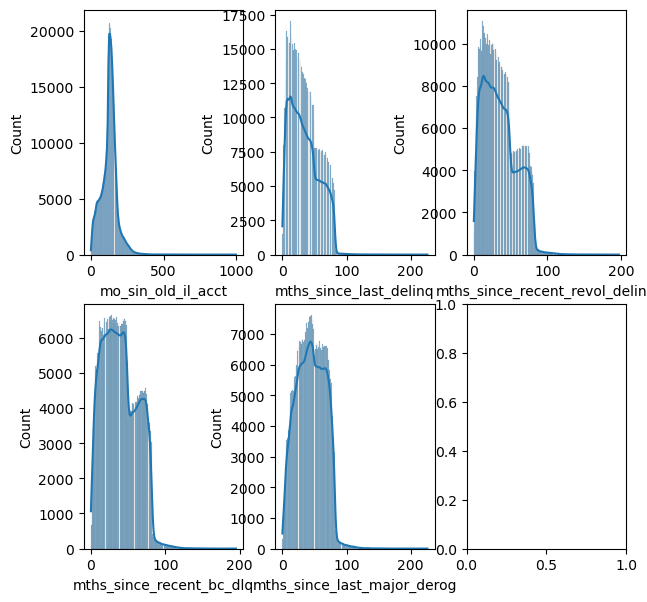

In [85]:
%matplotlib inline
fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=trn_dropEDA, x="mo_sin_old_il_acct", kde=True, ax=axs[0, 0])
sns.histplot(data=trn_dropEDA, x="mths_since_last_delinq", kde=True, ax=axs[0, 1])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_revol_delinq", kde=True, ax=axs[0, 2])
sns.histplot(data=trn_dropEDA, x="mths_since_recent_bc_dlq", kde=True, ax=axs[1, 0])
sns.histplot(data=trn_dropEDA, x="mths_since_last_major_derog", kde=True, ax=axs[1, 1])

In [86]:
trn_dropEDA[['mo_sin_old_il_acct', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq',
             'mths_since_recent_bc_dlq', 'mths_since_last_major_derog']].describe()

,mo_sin_old_il_acct,mths_since_last_delinq,mths_since_recent_revol_delinq,mths_since_recent_bc_dlq,mths_since_last_major_derog
count,1.770230e+06,894609.000000,610231.000000,430235.000000,480998.000000
mean,1.259513e+02,34.565229,35.804118,39.324753,44.238080
std,5.331117e+01,21.898461,22.315879,22.625528,21.544932
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9.600000e+01,16.000000,17.000000,21.000000,27.000000
50%,1.300000e+02,31.000000,33.000000,37.000000,44.000000
75%,1.540000e+02,50.000000,51.000000,57.000000,62.000000
max,9.990000e+02,226.000000,197.000000,195.000000,226.000000


## time obj column

Remove all time object column, use transformed column only: ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']


Remove (for info only, not useful for training): 'last_pymnt_d' (Last month payment was received), 'next_pymnt_d', issue_d 

issue_d:The month which the loan was funded

 'last_credit_pull_d',		The most recent month bank pulled credit for this loan
 
'last_credit_pull_d' - 'earliest_cr_line' credit duration/history:


In [87]:
# raw format 
time_coln = ['earliest_cr_line','last_credit_pull_d','mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog']
trn_dropEDA[time_coln]

,earliest_cr_line,last_credit_pull_d,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_last_delinq,mths_since_recent_revol_delinq,mths_since_recent_bc_dlq,mths_since_last_major_derog
0,Apr-2011,Jan-2019,91.0,71.0,NaN,NaN,NaN,NaN
1,Nov-2008,Feb-2019,120.0,89.0,60.0,60.0,60.0,60.0
2,Jun-2006,Nov-2018,128.0,149.0,62.0,62.0,64.0,62.0
3,Jun-2005,Feb-2019,161.0,99.0,16.0,73.0,NaN,NaN
4,Feb-2013,Feb-2019,66.0,68.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1827120,Aug-1996,Feb-2019,37.0,253.0,NaN,NaN,NaN,NaN
1827121,Jan-2004,Feb-2019,157.0,164.0,NaN,NaN,NaN,NaN
1827122,Feb-1995,Feb-2019,134.0,271.0,NaN,NaN,NaN,NaN
1827123,Jul-2003,Feb-2019,170.0,67.0,7.0,7.0,9.0,NaN


## Summaries trn_dropEDA_time. Transform date, add  cr_dur_yr feature - use on test dataset as well 

In [88]:
trn_dropEDA_date = pd.to_datetime(trn_dropEDA[['earliest_cr_line', 'last_credit_pull_d']].stack(), infer_datetime_format=True).unstack()
# trn_dropEDA[['issue_d', 'earliest_cr_line', 'last_credit_pull_d']
          #  ].str.replace('-', '').astype(int)
    
    
# 'last_credit_pull_d' - 'earliest_cr_line' credit duration/history:
# add to dropEDA set
trn_dropEDA_time = trn_dropEDA.copy()
trn_dropEDA_time['cr_dur_yr'] = ((trn_dropEDA_date['last_credit_pull_d'] - trn_dropEDA_date['earliest_cr_line'])/pd.Timedelta('365 days')).astype(float)


time_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'] + ['mo_sin_rcnt_rev_tl_op',
                                                                                                     'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_rcnt_il', 'mths_since_last_record', 'mths_since_recent_inq']
trn_dropEDA_time = trn_dropEDA_time.drop(columns=time_drop)
# trn_dropEDA_time.to_csv('trn_dropEDA_time.csv')

In [89]:
trn_dropEDA_time.shape

print(f'train_csv features: {train.shape[1]}')
print(f'trn features after encoding dv and remove >90% missing data column: {trn.shape[1]}')
print(f'trn_dropEDA features after EDA: {trn_dropEDA.shape[1]} \n')
print(f'Features removed after preminliary EDA: {train.shape[1]-trn_dropEDA.shape[1]} \n')
print(f'trn_dropEDA_time features after time EDA (1 feature added): {trn_dropEDA_time.shape[1]}')
print(f'Features removed after time EDA: {trn_dropEDA.shape[1]-trn_dropEDA_time.shape[1]}')


#trn_dropEDA.to_csv('trn_dropEDA.csv')

train_csv features: 145
trn features after encoding dv and remove >90% missing data column: 108
trn_dropEDA features after EDA: 85 

Features removed after preminliary EDA: 60 

trn_dropEDA_time features after time EDA (1 feature added): 75
Features removed after time EDA: 10


# Imputation - use trn_dropEDA

Assess importance of variables from baseline model and see if wroth imputing

Impute dti with dti_joint

Impute inq_last_6mths with mean inq (use 1) and remove inq_last_12m, inq_fi

mths_since_last_delinq    
all_util   
revol_util
emp_length                
                  


__Column to remove__: ['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75','open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal']

In [90]:
trn_dropEDA_time_na = trn_dropEDA_time.isna().sum().sort_values(ascending=False)
trn_dropEDA_time_na[trn_dropEDA_time_na>0]

mths_since_recent_bc_dlq          1396890
mths_since_last_major_derog       1346127
mths_since_recent_revol_delinq    1216894
mths_since_last_delinq             932516
il_util                            815757
all_util                           642907
open_acc_6m                        642717
total_cu_tl                        642717
inq_last_12m                       642717
open_rv_12m                        642716
open_il_24m                        642716
open_il_12m                        642716
open_act_il                        642716
open_rv_24m                        642716
max_bal_bc                         642716
inq_fi                             642716
emp_length                         119754
num_tl_120dpd_2m                    68149
mo_sin_old_il_acct                  56895
bc_util                             21354
percent_bc_gt_75                    20805
bc_open_to_buy                      20443
dti                                  1451
revol_util                        

In [91]:
trn_dropEDA_time.drop(columns=['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75',
                      'open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal']).isna().sum().sort_values(ascending=False)[trn_dropEDA_time.drop(columns=['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75',
                      'open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal']).isna().sum().sort_values(ascending=False) > 0]


mths_since_last_delinq    932516
all_util                  642907
emp_length                119754
dti                         1451
revol_util                  1414
inq_last_6mths                 1
dtype: int64

In [92]:
trn_dropEDA_time_imp = trn_dropEDA_time.drop(columns=['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75',
                      'open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal'])
print(f'Features after selection from NaNs : {trn_dropEDA_time_imp.shape[1]}')

Features after selection from NaNs : 53


In [93]:
trn_dropEDA_time_imp.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'all_util',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'debt_settlement_flag',
 'loan_status_dv',
 'cr_dur_yr']

In [94]:
# Impute dti 
# replace trn_dropEDA_time with test dataset cleaned 
train[train['dti'].isna()].index # get index with missing dti
trn_dropEDA_time.loc[train[train['dti'].isna()].index, 'dti'] = train[train['dti'].isna()]['dti_joint'].values

# check if all replaced correctly with dti_joint
# print(f"All dti replaced correctly: {(trn_dropEDA_time.loc[train[train['dti'].isna()].index, 'dti'] == train[train['dti'].isna()]['dti_joint']).unique()}")
#print(trn.isna().sum().sort_values(ascending=False).head(38))

In [95]:
# Impute inquiries 
# the NA row: trn[trn['inq_last_6mths'].isna()][['inq_last_12m','inq_last_6mths','inq_fi','loan_status_dv']]
# inq skew to the right - use mean for imputation
# (trn['inq_fi'].mean()+trn['inq_last_6mths'].mean()+trn['inq_last_12m'].mean())/3
print(trn_dropEDA_time['inq_last_6mths'].value_counts(normalize=True))
# plt.hist(trn_dropEDA_time['inq_last_6mths'])

trn_dropEDA_time.loc[trn_dropEDA_time[trn_dropEDA_time['inq_last_6mths'].isna()].index, 'inq_last_6mths'] = math.ceil(trn_dropEDA_time['inq_last_6mths'].mean()) # Impute to 1

0.0    0.622263
1.0    0.255949
2.0    0.084248
3.0    0.027730
4.0    0.007016
5.0    0.002428
6.0    0.000366
Name: inq_last_6mths, dtype: float64


# PCA - feature importance

From model performance plot, the more components the better. Dimension reduction does not help here

In [96]:
# check NAs
trn_dropEDA_time_imp.isna().sum().sort_values(ascending=False).head(5)

mths_since_last_delinq    932516
all_util                  642907
emp_length                119754
dti                         1451
revol_util                  1414
dtype: int64

In [97]:
# create list of features for PCA, target variables, remove object/categorical variables, months
trn_dropEDA_time_imp_coln=trn_dropEDA_time_imp.columns.tolist()

# remove object and target columns
trn_dropEDA_time_imp_col_types = trn_dropEDA_time_imp.dtypes.to_frame('dtypes').reset_index()
trn_dropEDA_time_imp_objcoln= trn_dropEDA_time_imp_col_types[trn_dropEDA_time_imp_col_types['dtypes']=='O']['index'].tolist() 

trn_dropEDA_time_imp_PCA_coln=[i for i in trn_dropEDA_time_imp_coln if i not in ['loan_status_dv']+trn_dropEDA_time_imp_objcoln]

# check data with NaN
# print(trn_dropEDA_time_imp[trn_dropEDA_time_imp_PCA_coln].isna().sum().sort_values(ascending=False).head(3))

# remove data with NaN
trn_dropEDA_time_imp_PCA_coln=[i for i in trn_dropEDA_time_imp_coln if i not in ['loan_status_dv']+trn_dropEDA_time_imp_objcoln+trn_dropEDA_time_imp[trn_dropEDA_time_imp_PCA_coln].isna().sum().sort_values(ascending=False).head().index.tolist()]
trn_dropEDA_time_imp_PCA_coln;

In [98]:
len(trn_dropEDA_time_imp_PCA_coln)

40

While you can use PCA on binary data (e.g. one-hot encoded data) that does not mean it is a good thing, or it will work very well.

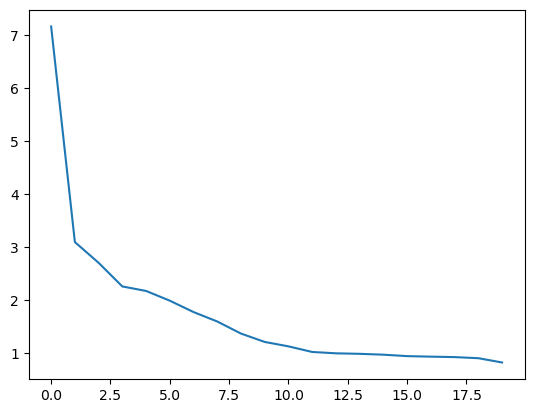

In [99]:
%matplotlib inline
# process flow
features = trn_dropEDA_time_imp_PCA_coln # exclude 'dv', 'loan_status'

# features
x = trn_dropEDA_time_imp.loc[:, features].values

# target
y = trn_dropEDA_time_imp.loc[:,['loan_status_dv']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
n_samples = x.shape[0]


# set up PCA 
n_pc = 20 # variance preserved; number of features to reduce to. goal to get 95% of variance explained .
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
            # , columns = ['pc_'+str(i+1) for i in range(n_pc)])

# calculate eigenvalues
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)
plt.show()

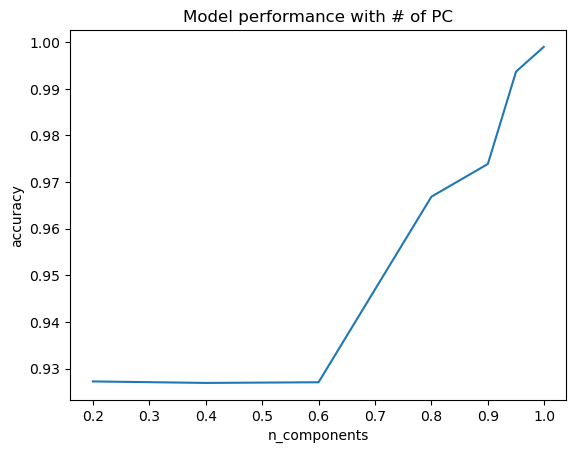

In [100]:
%matplotlib inline
X = trn_dropEDA_time_imp[trn_dropEDA_time_imp_PCA_coln]
y = trn_dropEDA_time_imp.dropna(axis='columns')[['loan_status_dv']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

PC_list=[0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.999]
accuracy=[]
for n_components in PC_list:
    pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components)), ('model', LogisticRegression(max_iter=1000))])
    pipe = pipe.fit(X_train,np.ravel(y_train))
    accuracy.append(pipe.score(X_test, np.ravel(y_test)))

plt.plot(PC_list,accuracy)
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('Model performance with # of PC')
plt.show()

# Decision tree feature importance

Use the same modified trn_dropEDA_time_imp data as PCA for decision tree feature importance.

3 most important features: 

- recoveries	0.937
- last_pymnt_amnt	0.051
- out_prncp	0.013

https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445

https://github.com/Eligijus112/gradient-boosting/blob/master/regression/feature_importance.ipynb

In [101]:
X = trn_dropEDA_time_imp[trn_dropEDA_time_imp_PCA_coln]
y = trn_dropEDA_time_imp.dropna(axis='columns')[['loan_status_dv']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

features = X.columns.tolist()


# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Load tree 
tree = DecisionTreeRegressor(**hps)

# Fit
tree.fit(X_train, y_train)

# Feature mportances 
importances = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance = {}
for i, feature in enumerate(features):
    feature_importance[feature] = round(importances[i], 3)

print(f"Feature importance by sklearn: {feature_importance}")

# Creating a dataframe with the feature importance by our method and the sklearn method
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Feature importance": [feature_importance[feature] for feature in features]
}).sort_values('Feature importance', ascending=False)
feature_importance_df[feature_importance_df['Feature importance']!=0]

Feature importance by sklearn: {'loan_amnt': 0.0, 'int_rate': 0.0, 'annual_inc': 0.0, 'delinq_2yrs': 0.0, 'pub_rec': 0.0, 'revol_bal': 0.0, 'total_acc': 0.0, 'out_prncp': 0.013, 'total_pymnt': 0.0, 'total_rec_int': 0.0, 'total_rec_late_fee': 0.0, 'recoveries': 0.937, 'last_pymnt_amnt': 0.051, 'collections_12_mths_ex_med': 0.0, 'acc_now_delinq': 0.0, 'tot_coll_amt': 0.0, 'total_rev_hi_lim': 0.0, 'acc_open_past_24mths': 0.0, 'chargeoff_within_12_mths': 0.0, 'delinq_amnt': 0.0, 'mo_sin_old_rev_tl_op': 0.0, 'mort_acc': 0.0, 'num_accts_ever_120_pd': 0.0, 'num_actv_bc_tl': 0.0, 'num_bc_sats': 0.0, 'num_bc_tl': 0.0, 'num_il_tl': 0.0, 'num_op_rev_tl': 0.0, 'num_rev_tl_bal_gt_0': 0.0, 'num_sats': 0.0, 'num_tl_30dpd': 0.0, 'num_tl_90g_dpd_24m': 0.0, 'num_tl_op_past_12m': 0.0, 'pub_rec_bankruptcies': 0.0, 'tax_liens': 0.0, 'tot_hi_cred_lim': 0.0, 'total_bal_ex_mort': 0.0, 'total_bc_limit': 0.0, 'total_il_high_credit_limit': 0.0, 'cr_dur_yr': 0.0}


,Feature,Feature importance
11,recoveries,0.937
12,last_pymnt_amnt,0.051
7,out_prncp,0.013


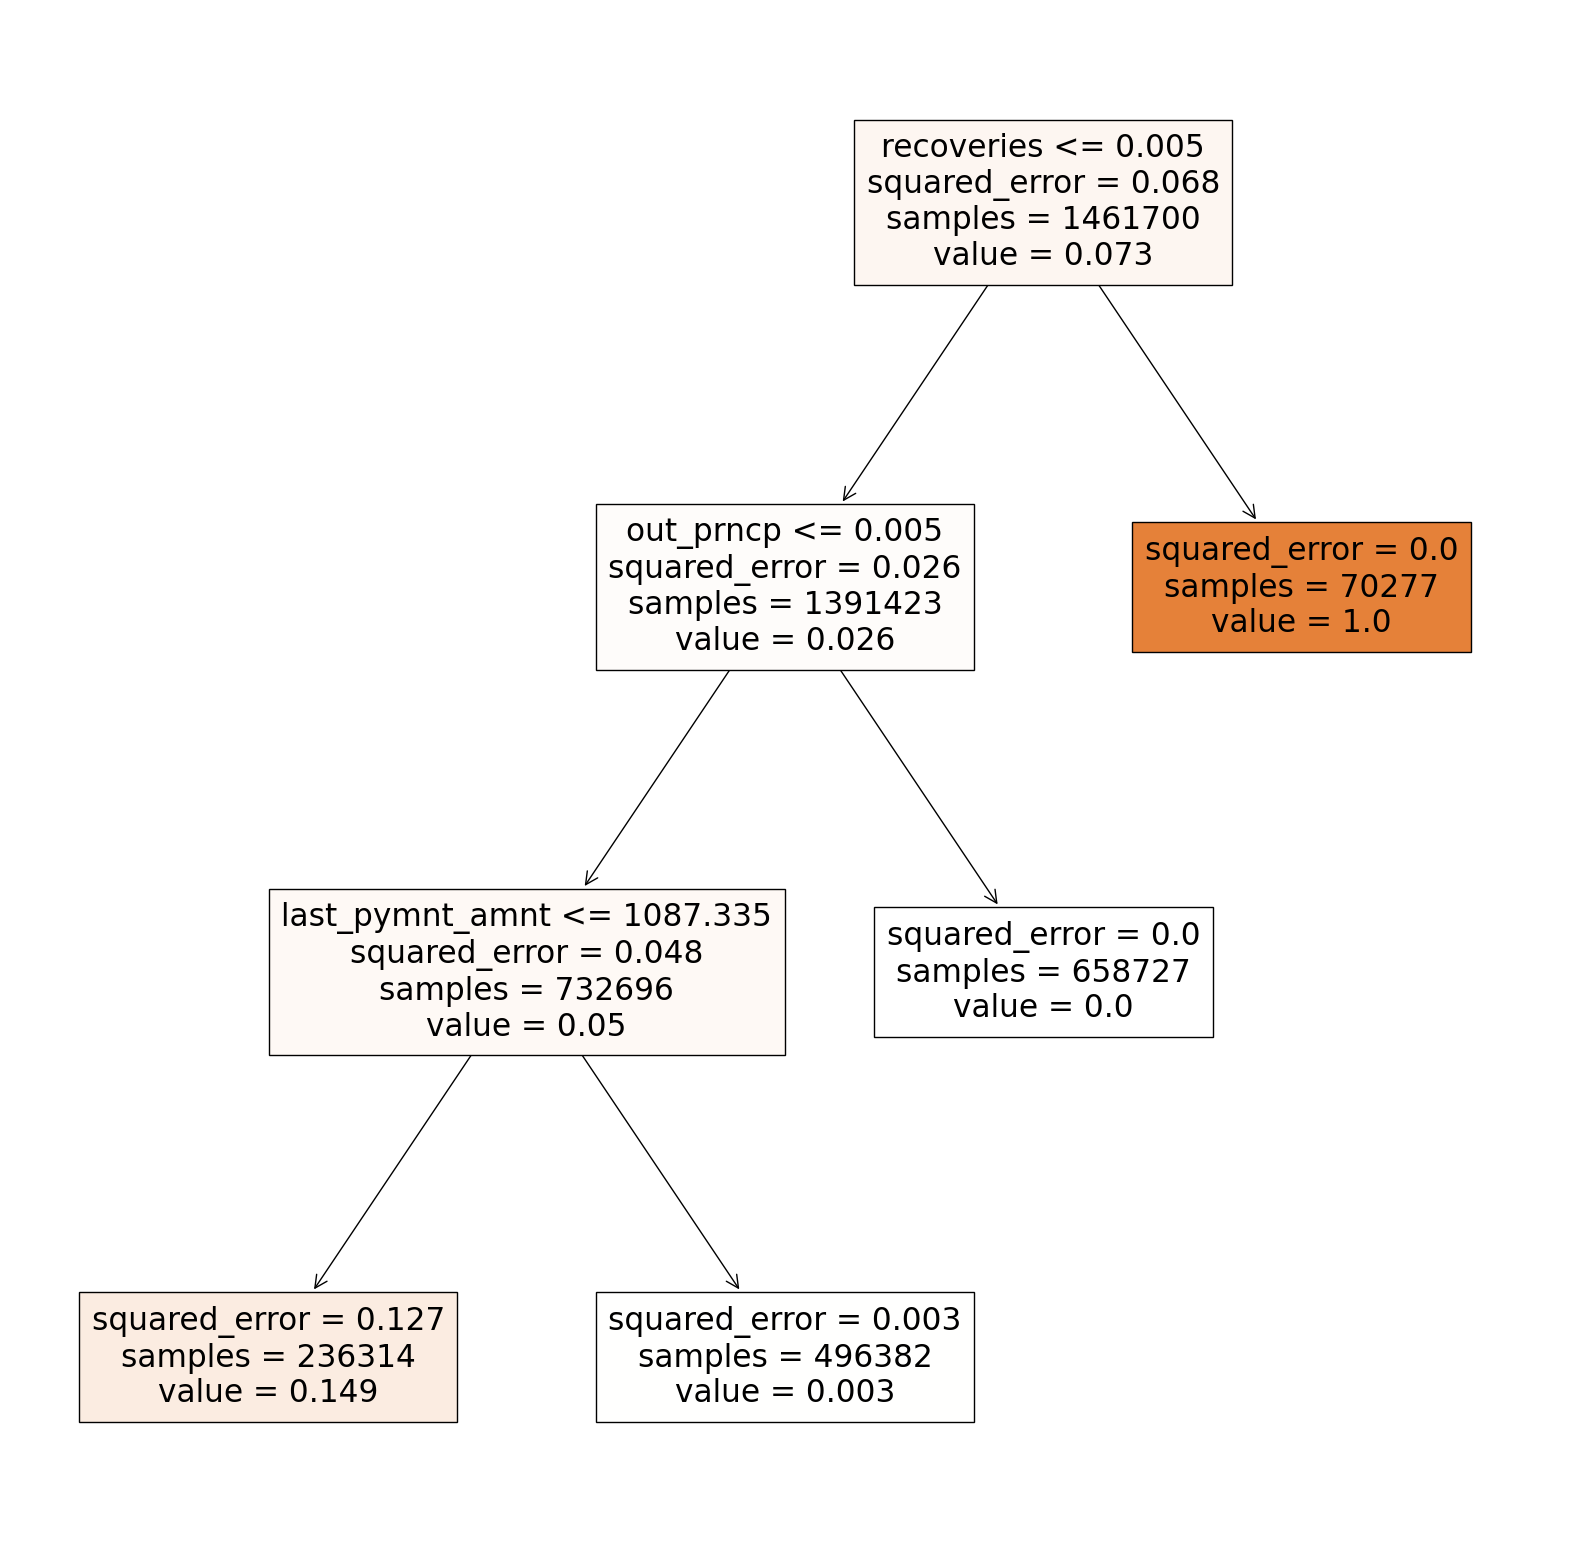

In [102]:
%matplotlib inline
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

# Executive summary from EDA

In [103]:
print(f'train_csv features: {train.shape[1]}')
print(f'trn features after encoding dv and remove >90% missing data column: {trn.shape[1]}')
print(f'trn_dropEDA features after EDA: {trn_dropEDA.shape[1]} \n')
print(f'Features removed after preminliary EDA: {train.shape[1]-trn_dropEDA.shape[1]} \n')

print(f'trn_dropEDA_time features after time EDA (1 feature added): {trn_dropEDA_time.shape[1]}')
print(f'Features removed after time EDA: {trn_dropEDA.shape[1]-trn_dropEDA_time.shape[1]} \n')

print(f'Features after selection from NaNs : {trn_dropEDA_time_imp.shape[1]}')
print(f'Features removed after selection from NaNs: {trn_dropEDA_time.shape[1]-trn_dropEDA_time_imp.shape[1]}')


trn_dropEDA_time_imp

train_csv features: 145
trn features after encoding dv and remove >90% missing data column: 108
trn_dropEDA features after EDA: 85 

Features removed after preminliary EDA: 60 

trn_dropEDA_time features after time EDA (1 feature added): 75
Features removed after time EDA: 10 

Features after selection from NaNs : 53
Features removed after selection from NaNs: 22


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,purpose,addr_state,dti,...,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status_dv,cr_dur_yr
0,10000,36 months,8.81,A,A5,NaN,56000.0,debt_consolidation,AZ,20.53,...,2.0,1.0,0.0,327790.0,30771.0,12000.0,34590.0,N,1,7.758904
1,10000,60 months,27.27,E,E5,10+ years,70000.0,debt_consolidation,IL,11.37,...,3.0,0.0,0.0,25493.0,23289.0,1800.0,21693.0,N,1,10.257534
2,4800,36 months,16.91,C,C5,10+ years,111000.0,debt_consolidation,VA,13.35,...,5.0,0.0,0.0,41728.0,32060.0,7100.0,33584.0,N,1,12.427397
3,35000,36 months,14.47,C,C2,1 year,95000.0,home_improvement,TX,11.61,...,1.0,0.0,0.0,501756.0,56195.0,0.0,62815.0,N,1,13.679452
4,16000,60 months,10.08,B,B1,< 1 year,45000.0,debt_consolidation,MN,25.52,...,2.0,0.0,0.0,85395.0,28179.0,31100.0,30195.0,N,1,6.002740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827120,30000,60 months,30.75,F,F5,6 years,100000.0,debt_consolidation,FL,22.13,...,3.0,0.0,0.0,201286.0,68680.0,16500.0,64086.0,N,0,22.517808
1827121,12000,60 months,14.08,C,C3,10+ years,58000.0,debt_consolidation,VT,20.88,...,3.0,0.0,0.0,73948.0,45212.0,6200.0,49448.0,N,0,15.095890
1827122,10000,36 months,11.99,B,B5,10+ years,64000.0,debt_consolidation,IL,12.96,...,1.0,0.0,0.0,203417.0,36448.0,2000.0,29317.0,N,0,24.016438
1827123,12000,60 months,21.45,D,D5,NaN,60000.0,debt_consolidation,AK,30.82,...,3.0,0.0,0.0,118975.0,65238.0,22000.0,81975.0,N,0,15.600000


## train to trn

In [104]:
trn = train.copy().drop(columns=na_tally[na_tally>train.shape[0]*0.9].index)
trn['loan_status_dv'] = [0 if loan_status=='Fully Paid' or loan_status=='Current' else 1 for loan_status in trn['loan_status']]

## trn to trn_dropEDA

In [105]:
coln_obj = col_types[col_types['dtypes']=='O']['index'] # object types may affect model training
coln_obj_drop = [i for i in coln_obj.tolist() if i not in ['term', 'grade', 'sub_grade', 'debt_settlement_flag', 'emp_length', 'purpose', 'addr_state',
                                                           'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]
trn_dropEDA = trn.copy().drop(columns=coln_obj_drop+['policy_code', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv']+['installment', 'open_acc', 'total_rec_prncp', 'collection_recovery_fee', 'tot_cur_bal', 'total_bal_il', 'num_actv_rev_tl'])
#trn_dropEDA.to_csv('trn_dropEDA.csv')

## trn_dropEDA to trn_dropEDA_time

In [106]:
trn_dropEDA_date = pd.to_datetime(trn_dropEDA[['earliest_cr_line', 'last_credit_pull_d']].stack(), infer_datetime_format=True).unstack()
    
# add to dropEDA set
trn_dropEDA_time = trn_dropEDA.copy()
trn_dropEDA_time['cr_dur_yr'] = ((trn_dropEDA_date['last_credit_pull_d'] - trn_dropEDA_date['earliest_cr_line'])/pd.Timedelta('365 days')).astype(float)


time_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'] + ['mo_sin_rcnt_rev_tl_op',
                                                                                                     'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_rcnt_il', 'mths_since_last_record', 'mths_since_recent_inq']
trn_dropEDA_time = trn_dropEDA_time.drop(columns=time_drop)
# trn_dropEDA_time.to_csv('trn_dropEDA_time.csv')

## trn_dropEDA_time to trn_dropEDA_time_imp

In [107]:
trn_dropEDA_time_imp = trn_dropEDA_time.drop(columns=['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75',
                      'open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal'])

In [108]:
# Impute dti 
train[train['dti'].isna()].index # get index with missing dti
trn_dropEDA_time.loc[train[train['dti'].isna()].index, 'dti'] = train[train['dti'].isna()]['dti_joint'].values


# Impute inquiries 
trn_dropEDA_time.loc[trn_dropEDA_time[trn_dropEDA_time['inq_last_6mths'].isna()].index, 'inq_last_6mths'] = math.ceil(trn_dropEDA_time['inq_last_6mths'].mean()) # Impute to 1

In [109]:
print(f'train_csv features: {train.shape[1]}')
print(f'trn features after encoding dv and remove >90% missing data column: {trn.shape[1]}')
print(f'trn_dropEDA features after EDA: {trn_dropEDA.shape[1]} \n')
print(f'Features removed after preminliary EDA: {train.shape[1]-trn_dropEDA.shape[1]} \n')

print(f'trn_dropEDA_time features after time EDA (1 feature added): {trn_dropEDA_time.shape[1]}')
print(f'Features removed after time EDA: {trn_dropEDA.shape[1]-trn_dropEDA_time.shape[1]} \n')

print(f'Features after selection from NaNs : {trn_dropEDA_time_imp.shape[1]}')
print(f'Features removed after selection from NaNs: {trn_dropEDA_time.shape[1]-trn_dropEDA_time_imp.shape[1]}')


train_csv features: 145
trn features after encoding dv and remove >90% missing data column: 108
trn_dropEDA features after EDA: 85 

Features removed after preminliary EDA: 60 

trn_dropEDA_time features after time EDA (1 feature added): 75
Features removed after time EDA: 10 

Features after selection from NaNs : 53
Features removed after selection from NaNs: 22


# Dataset transformation blueprint for ML 

Assume structure train and test dataset are the same

train_ML 

test_ML

In [110]:
df_train = train.copy()

#########
na_tally = df_train.isna().sum().sort_values(ascending = False)
df_train = df_train.drop(columns=na_tally[na_tally>df_train.shape[0]*0.9].index)
df_train['loan_status_dv'] = [0 if loan_status=='Fully Paid' or loan_status=='Current' else 1 for loan_status in df_train['loan_status']]
    ###
col_types = df_train.dtypes.to_frame('dtypes').reset_index()
coln_obj = col_types[col_types['dtypes']=='O']['index'] 
coln_obj_drop = [i for i in coln_obj.tolist() if i not in ['term', 'grade', 'sub_grade', 'debt_settlement_flag', 'emp_length', 'purpose', 'addr_state',
                                                           'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]
df_dropEDA = df_train.copy().drop(columns=coln_obj_drop+['policy_code', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv']+['installment', 'open_acc', 'total_rec_prncp', 'collection_recovery_fee', 'tot_cur_bal', 'total_bal_il', 'num_actv_rev_tl'])
    ###
df_dropEDA_date = pd.to_datetime(df_dropEDA[['earliest_cr_line', 'last_credit_pull_d']].stack(), infer_datetime_format=True).unstack()
    # add to dropEDA set
df_dropEDA_time = df_dropEDA.copy()
df_dropEDA_time['cr_dur_yr'] = ((df_dropEDA_date['last_credit_pull_d'] - df_dropEDA_date['earliest_cr_line'])/pd.Timedelta('365 days')).astype(float)
time_drop = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'] + ['mo_sin_rcnt_rev_tl_op',
                                                                                                     'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_rcnt_il', 'mths_since_last_record', 'mths_since_recent_inq']
df_dropEDA_time = df_dropEDA_time.drop(columns=time_drop)
df_dropEDA_time_imp = df_dropEDA_time.drop(columns=['pct_tl_nvr_dlq', 'bc_open_to_buy', 'inq_fi', 'inq_last_12m', 'num_rev_accts', 'num_tl_120dpd_2m', 'percent_bc_gt_75',
                      'open_acc_6m', 'open_rv_12m', 'open_il_24m', 'open_il_12m', 'open_act_il', 'open_rv_24m', 'total_cu_tl', 'il_util', 'bc_util','max_bal_bc','mo_sin_old_il_acct','mths_since_recent_revol_delinq','mths_since_recent_bc_dlq','mths_since_last_major_derog','avg_cur_bal'])
df_dropEDA_time_imp
######

train_ML = df_dropEDA_time_imp
print(f'train_ML features: {train_ML.shape[1]}')

train_ML features: 53


# Final EDA

In [111]:
profile = ProfileReport(train_ML, minimal=True, title="Loans trn Profiling Report")
#profile.to_file("train_ML.html")